In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[15,6]

In [6]:
sales = pd.read_csv('~/downloads/train_v9rqX0R.csv')
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
sales.shape

# Dataframe has 8523 rows and 12 columns

(8523, 12)

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 1. Univariate Analysis
    * Numerical Variables

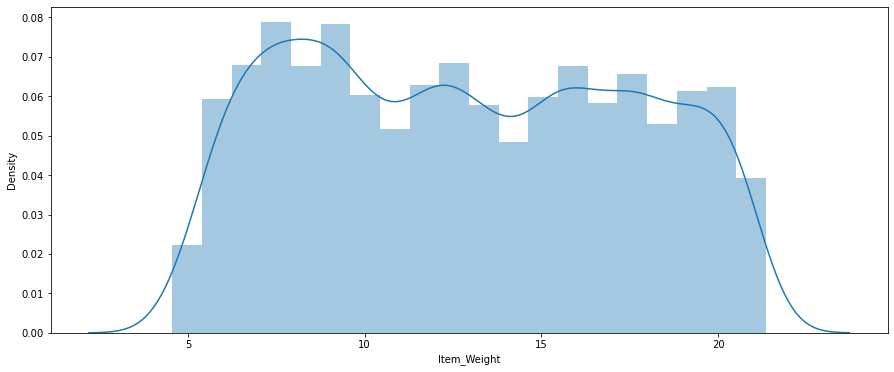

In [16]:
# Item Weight

sns.distplot(sales['Item_Weight'])
plt.show()

Since the spread is high we can say that Item Weight is uniformally distributed.


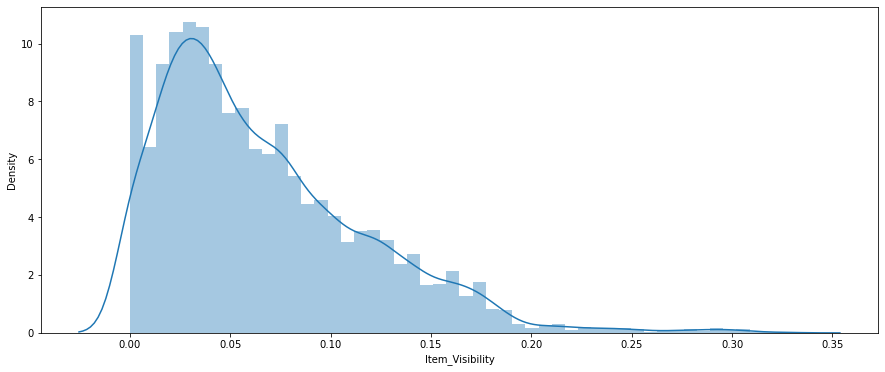

In [20]:
# Item Visibility

sns.distplot(sales['Item_Visibility'])
plt.show()

In [22]:
sales['Item_Visibility'].skew()

1.1670905496918396

Item Visibility is +vely skewed.

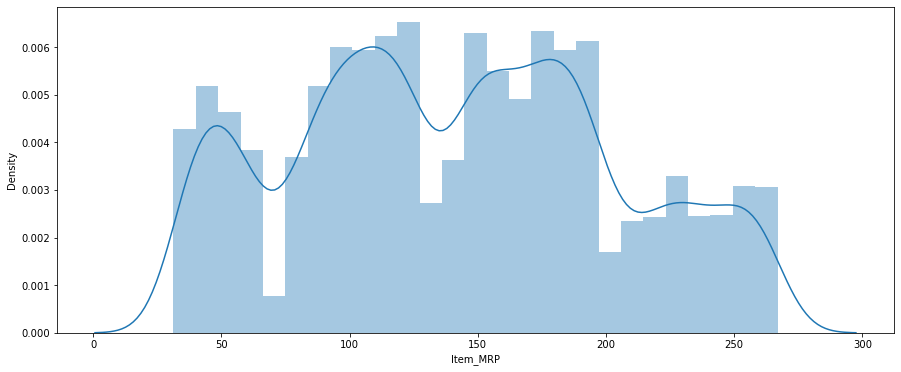

In [24]:
# Item MRP
sns.distplot(sales['Item_MRP'])
plt.show()

Item MRP have different frequencies and by looking at it we can say that it is multimodal data.

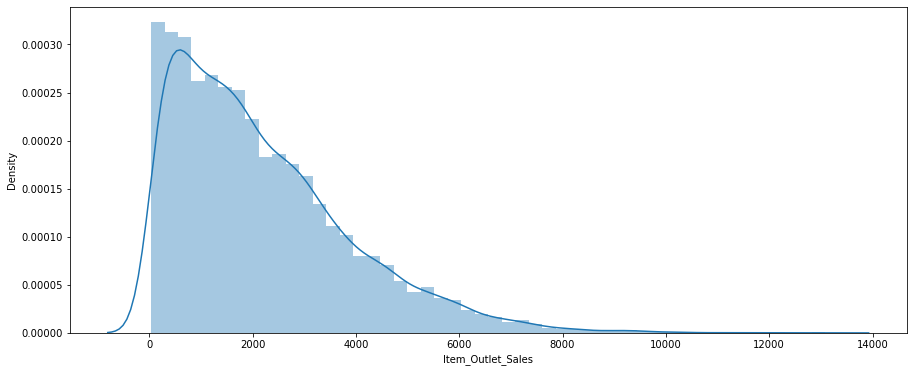

In [28]:
# Item_Outlet_Sales / Target variable

sns.distplot(sales['Item_Outlet_Sales'])
plt.show()

In [29]:
sales['Item_Outlet_Sales'].skew()

1.1775306028542796

By looking at the distribution it is clear that it is positively skewed and as the skewness is more than 1 we can say that it is prefectely skewed.

### 1. Univariate Analysis
    * Categorical Variables

In [33]:
# Find the list of categories
sales.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [38]:
cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

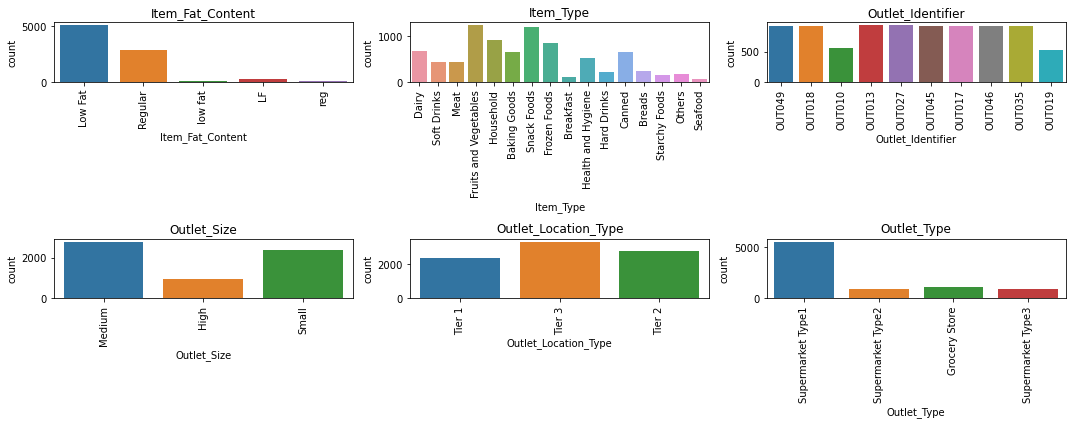

In [41]:
row = 2
colm = 3
iterator = 1

for i in cols:
    plt.subplot(row,colm,iterator)
    sns.countplot(sales.loc[:,i])
    plt.title(i)
    plt.xticks(rotation=90)
    iterator+=1
plt.tight_layout()
plt.show()

**Inference**
* Most of the items that are sold are **Low Fat**
* Highest sold item types are **Fruits and Vegetables, Snack Foods, Frozen Foods, Households**.
* Highest sales are from **Medium** type of Outlet Size.
* Most of the business are opened in **Tier 3** cities.
* Most of the business are opened in **Supermarket Type 1**.

### 2. Bivariate Analysis
    * Numerical vs Numerical Variables

In [45]:
sales.select_dtypes(include=np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [46]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

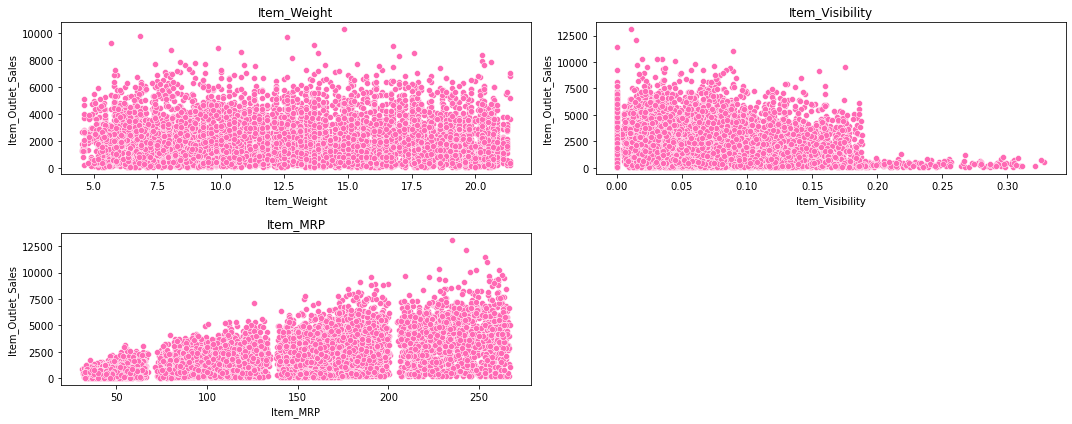

In [51]:
rows = 2
columns = 2
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.scatterplot(x=sales.loc[:,i],y=sales['Item_Outlet_Sales'],color='hotpink')
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

**Inference**
* Item Visibility has zeroes and as the visibility is high sales are less. In other words we can say that high visibility items have low sales.

### 2. Bivariate Analysis
    * Numerical vs Catergorical

In [54]:
sales.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [55]:
cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

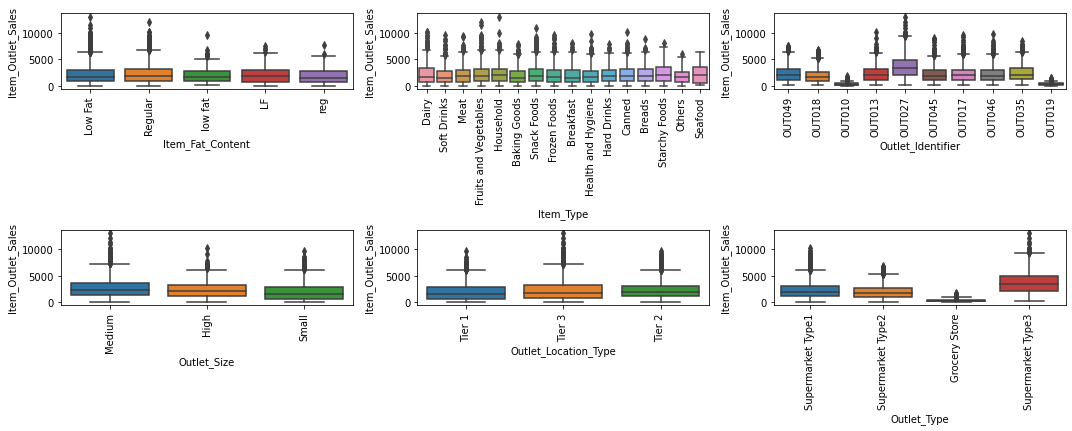

In [57]:
rows = 2
columns = 3
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(x=sales.loc[:,i],y=sales['Item_Outlet_Sales'])
    plt.xticks(rotation = 90)
    iterator+=1
plt.tight_layout()
plt.show()

<AxesSubplot:>

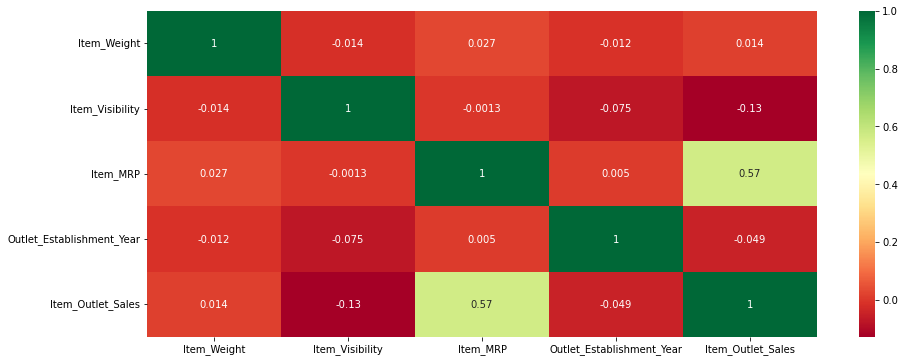

In [61]:
# Correlation
sns.heatmap(sales.corr(),annot=True,cmap='RdYlGn')

In [ ]:
# Item MRP is highly correlated with the Item Outlet sales.

### Missing values

In [64]:

sales.isnull().sum()[sales.isnull().sum()!=0]
# These are the null values in the Dataset

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [65]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
sales['Item_Weight'] = sales.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

In [68]:
sales['Item_Weight'].isnull().sum()

# Still there are 4 null values.

4

In [69]:
sales['Item_Weight'] = sales.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

In [84]:
sales['Item_Weight'].isnull().sum()
# No null values in the Item Weight

0

In [76]:
# Dealing with the null values in Outlet_Size

mode = sales['Outlet_Size'].mode()[0]

sales['Outlet_Size'] = sales['Outlet_Size'].fillna(value=mode)


### Feature Engineering

In [81]:
sales['Item_Identifier'] = sales['Item_Identifier'].apply(lambda x: x[:2])
sales['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

Now we have only three categories for the Item Identifier. FD for eatables, DR for drinks, NC for Non consumables.

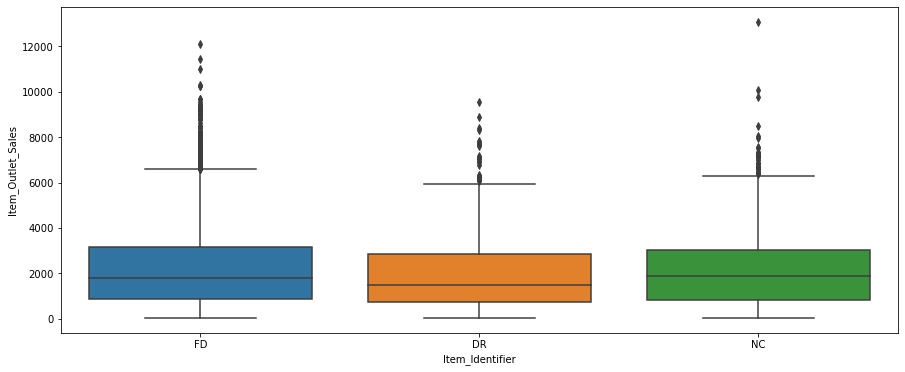

In [82]:
sns.boxplot(x=sales['Item_Identifier'],y=sales['Item_Outlet_Sales'])
plt.show()

In [83]:
sales['Item_Fat_Content'].unique()

# we have to replace low fat, LF , reg with Low Fat and Regular

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [85]:
sales["Item_Fat_Content"].replace(to_replace=['low fat','LF','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

In [86]:
sales['Item_Fat_Content'].unique()

# Now we have only two fat content

array(['Low Fat', 'Regular'], dtype=object)

**Binning the data**

In [88]:
sales['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [90]:
items = ['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast','Breads', 'Starchy Foods','Seafood']

def perishable(x):
    if x in items:
        return 'Perishable'
    else:
        return 'Non Perishable'

In [91]:
sales['Item_Type'] = sales['Item_Type'].apply(perishable)

In [97]:
sales.loc[sales['Item_Identifier']=='NC','Item_Fat_Content'] = 'Non Edible'

# We have replace Non Edible for non consumable products

In [102]:
# Replacing zeroes in the Item Visiblility

sales['Item_Visibility'] = sales['Item_Visibility'].transform(lambda x: x.replace(to_replace=0, value=x.median()))

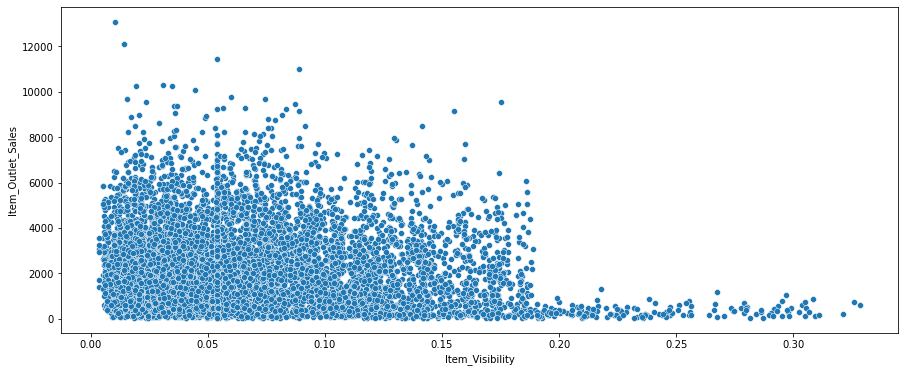

In [104]:
sns.scatterplot(x=sales['Item_Visibility'],y=sales['Item_Outlet_Sales'])
plt.show()

In [106]:
newsales = sales.drop(columns='Outlet_Establishment_Year')

In [108]:
newsales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Perishable,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Non Perishable,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Perishable,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.053931,Perishable,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Non Edible,0.053931,Non Perishable,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


**Scaling**

In [109]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

In [110]:
cols = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'] # Numerical columns
for i in cols:
    newsales.loc[:,i] = sc.fit_transform(pd.DataFrame(newsales.loc[:,i]))

In [111]:
newsales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,-0.769763,Low Fat,-1.092518,Perishable,1.747454,OUT049,Medium,Tier 1,Supermarket Type1,0.910601
1,DR,-1.497465,Regular,-1.026432,Non Perishable,-1.489023,OUT018,Medium,Tier 3,Supermarket Type2,-1.018440
2,FD,0.995668,Low Fat,-1.077939,Perishable,0.010040,OUT049,Medium,Tier 1,Supermarket Type1,-0.049238
3,FD,1.361672,Regular,-0.317641,Perishable,0.660050,OUT010,Medium,Tier 3,Grocery Store,-0.849103
4,NC,-0.849422,Non Edible,-0.317641,Non Perishable,-1.399220,OUT013,High,Tier 3,Supermarket Type1,-0.695373


**Encoding**

In [112]:
finaldata = pd.get_dummies(newsales,drop_first=True)

In [113]:
finaldata.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Perishable,Outlet_Identifier_OUT013,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.769763,-1.092518,1.747454,0.910601,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1,-1.497465,-1.026432,-1.489023,-1.018440,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0.995668,-1.077939,0.010040,-0.049238,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.361672,-0.317641,0.660050,-0.849103,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
4,-0.849422,-0.317641,-1.399220,-0.695373,0,1,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [114]:
finaldata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Perishable,Outlet_Identifier_OUT013,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,4.538133e-16,-1.293371e-16,-1.644427e-16,1.631662e-16,0.718644,0.187610,0.187610,0.352693,0.341664,0.109351,...,0.108999,0.109117,0.109117,0.610466,0.280183,0.326763,0.393054,0.654347,0.108882,0.109703
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,0.449687,0.390423,0.390423,0.477836,0.474295,0.312098,...,0.311656,0.311804,0.311804,0.487673,0.449115,0.469057,0.488457,0.475609,0.311509,0.312538
min,-1.791344e+00,-1.347634e+00,-1.761688e+00,-1.258790e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.806403e-01,-7.440196e-01,-7.574307e-01,-7.894057e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.851951e-02,-3.176414e-01,3.243893e-02,-2.267687e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.557256e-01,5.139076e-01,7.170372e-01,5.391513e-01,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.824560e+00,5.296196e+00,2.021724e+00,6.391045e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
# Library to import Train and Test Split

from sklearn.model_selection import train_test_split

In [140]:
# Split the data in X and Y
X = finaldata.drop('Item_Outlet_Sales',axis=1)
y = finaldata.Item_Outlet_Sales

In [141]:
# Split the X and Y in Train and Test
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.20,random_state = 0)

In [142]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(6818, 24)
(6818,)
(1705, 24)
(1705,)
